In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [5]:
dataset_path = '/content/drive/MyDrive/datasets/17Flowers/train'

In [6]:
idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

dataset_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

dataset_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    target_size=(224, 224)

)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [7]:
# image augmentation
idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

dataset_train_augmented = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

dataset_validation_augmented = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset='validation',
    target_size=(224, 224)

)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


In [8]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(265, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(1080, activation='relu'),
    layers.Dense(17, activation='softmax')
])

In [ ]:
tf.keras.layers.Dropout(0.5),

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [10]:
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=20)

Epoch 1/20
26/26 [==============================] - 9s 255ms/step - loss: 2.6140 - accuracy: 0.1142 - val_loss: 2.2812 - val_accuracy: 0.2132
Epoch 2/20
26/26 [==============================] - 7s 258ms/step - loss: 2.1499 - accuracy: 0.2758 - val_loss: 1.9577 - val_accuracy: 0.3046
Epoch 3/20
26/26 [==============================] - 6s 227ms/step - loss: 1.8319 - accuracy: 0.3949 - val_loss: 1.6488 - val_accuracy: 0.4213
Epoch 4/20
26/26 [==============================] - 6s 222ms/step - loss: 1.4410 - accuracy: 0.5055 - val_loss: 1.5789 - val_accuracy: 0.4061
Epoch 5/20
26/26 [==============================] - 6s 246ms/step - loss: 1.1176 - accuracy: 0.6173 - val_loss: 1.3747 - val_accuracy: 0.5635
Epoch 6/20
26/26 [==============================] - 7s 255ms/step - loss: 0.9407 - accuracy: 0.6622 - val_loss: 1.2332 - val_accuracy: 0.6041
Epoch 7/20
26/26 [==============================] - 6s 242ms/step - loss: 0.7024 - accuracy: 0.7436 - val_loss: 1.3671 - val_accuracy: 0.5482
Epoch 

In [11]:
history_augmented = model.fit(dataset_train_augmented,
                    validation_data=dataset_validation_augmented,
                    epochs=20)

Epoch 1/20
26/26 [==============================] - 17s 677ms/step - loss: 1.2365 - accuracy: 0.6561 - val_loss: 1.2170 - val_accuracy: 0.6193
Epoch 2/20
26/26 [==============================] - 16s 633ms/step - loss: 0.8218 - accuracy: 0.7461 - val_loss: 0.9676 - val_accuracy: 0.6548
Epoch 3/20
26/26 [==============================] - 18s 714ms/step - loss: 0.6876 - accuracy: 0.7716 - val_loss: 1.0900 - val_accuracy: 0.6447
Epoch 4/20
26/26 [==============================] - 17s 642ms/step - loss: 0.5820 - accuracy: 0.7922 - val_loss: 1.2072 - val_accuracy: 0.6294
Epoch 5/20
26/26 [==============================] - 18s 700ms/step - loss: 0.5896 - accuracy: 0.8007 - val_loss: 1.0712 - val_accuracy: 0.6244
Epoch 6/20
26/26 [==============================] - 17s 639ms/step - loss: 0.4765 - accuracy: 0.8323 - val_loss: 0.9387 - val_accuracy: 0.7107
Epoch 7/20
26/26 [==============================] - 19s 745ms/step - loss: 0.3820 - accuracy: 0.8736 - val_loss: 0.9362 - val_accuracy: 0.7259

In [16]:
idg = ImageDataGenerator(
    rescale=1./255
)

dataset_test = idg.flow_from_directory(
    '/content/drive/MyDrive/datasets/17Flowers/test',
    shuffle=True,
    subset='training',
    target_size=(224, 224)
)

Found 340 images belonging to 17 classes.


In [17]:
model.evaluate(dataset_test)

11/11 [==============================] - 125s 12s/step - loss: 1.2360 - accuracy: 0.6824


[1.2359827756881714, 0.6823529601097107]

In [18]:
X_vall, Y_vall = dataset_test[0]

Y_pred = model.predict(X_vall)

Y_vall = np.argmax(Y_vall, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)



1/1 [==============================] - 0s 132ms/step


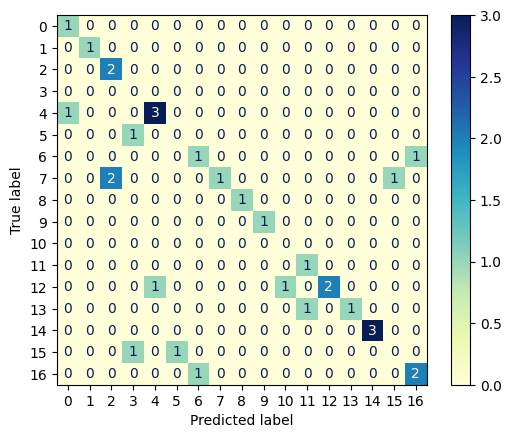

In [19]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_vall)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot(cmap='YlGnBu')
plt.show()